In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('C:/Users/91637/OneDrive/Desktop/ML Campus_X/18 Unsupervised ML/Kmeans/IPL_Ball_by_Ball_2008_2022.csv')

In [3]:
df.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
df.shape

(225954, 17)

In [5]:
eligible=df['batter'].value_counts()[df['batter'].value_counts() >100].index

In [6]:
eligible

Index(['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina',
       'RV Uthappa', 'MS Dhoni', 'G Gambhir', 'CH Gayle', 'AB de Villiers',
       ...
       'SE Rutherford', 'RJ Quiney', 'UT Khawaja', 'SL Malinga', 'DJ Harris',
       'AB McDonald', 'B Lee', 'RD Chahar', 'DJM Short', 'DJ Jacobs'],
      dtype='object', name='batter', length=265)

In [7]:
new_df=df[df['batter'].isin(eligible)]

In [8]:
total_run=new_df.groupby('batter')['batsman_run'].sum()

In [9]:
total_run.shape

(265,)

In [10]:
out_player=new_df['player_out'].value_counts()

In [11]:
out_ser = out_player[out_player.index.isin(eligible)]

In [12]:
out_ser.shape

(265,)

In [13]:
avg_df=(total_run/out_ser).reset_index().rename(columns={'index':'batsman',0:'average'})

In [14]:
avg_df.sort_values(by='average', ascending=False).head(10)



,batsman,average
146,MN van Wyk,55.666667
111,KL Rahul,46.927711
9,AC Voges,45.250000
82,HM Amla,44.384615
64,DP Conway,42.000000
52,DA Warner,41.723404
170,PD Collingwood,40.600000
14,AK Markram,40.538462
195,RM Patidar,40.400000
119,LMP Simmons,39.962963


In [15]:
sk_rate_df=((total_run/new_df['batter'].value_counts())*100).reset_index().rename(columns={'batter':'batsman',0:'strike_rate'})

In [16]:
sk_rate_df.sort_values(by='strike_rate', ascending=False).head(10)


,batsman,strike_rate
12,AD Russell,168.234323
33,BCJ Cutting,163.013699
104,K Gowtham,161.739130
98,JM Sharma,157.046980
122,LS Livingstone,155.965909
226,SP Narine,154.367470
89,JC Archer,152.343750
48,CR Brathwaite,150.833333
36,Bipul Sharma,150.806452
168,PBB Rajapaksa,150.364964


In [17]:
final_df=avg_df.merge(sk_rate_df,on='batsman')

In [18]:
final_df

,batsman,average,strike_rate
0,A Ashish Reddy,18.666667,142.857143
1,A Badoni,20.125000,115.827338
2,A Mishra,12.066667,88.292683
3,A Symonds,36.074074,124.711908
4,AA Jhunjhunwala,16.692308,99.541284
...,...,...,...
260,YBK Jaiswal,23.782609,133.414634
261,YK Pathan,29.559633,138.046272
262,YV Takawale,24.000000,104.918033
263,Yuvraj Singh,25.036364,124.784776


In [19]:
X = final_df.iloc[:,1:].values


C:\Users\91637\AppData\Local\Temp\ipykernel_6344\2065426487.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


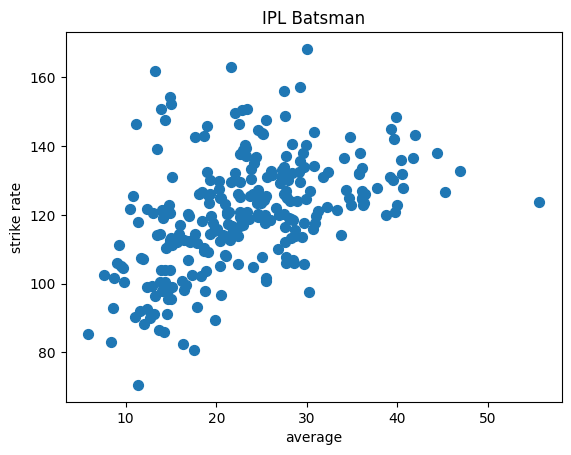

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("IPL Batsman")
plt.xlabel("average")
plt.ylabel("strike rate")
plt.show()

In [21]:
from sklearn.cluster import KMeans
l=[]
for i in range(1,10):
    kmeans = KMeans(n_init = 20, n_clusters = i)
    kmeans.fit(X)
    l.append(kmeans.inertia_)


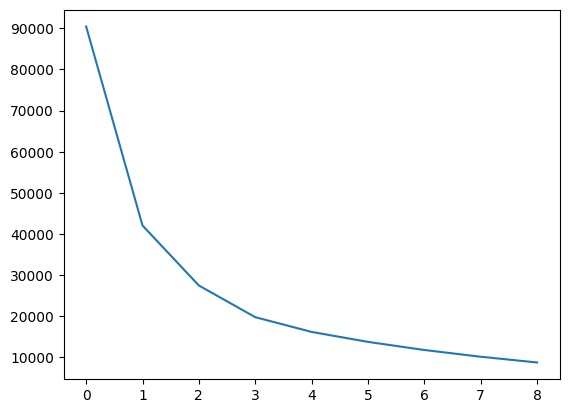

In [22]:
plt.plot(l)

In [23]:
kmeans = KMeans(n_init = 20, n_clusters = 4)
y_kmeans=kmeans.fit_predict(X)

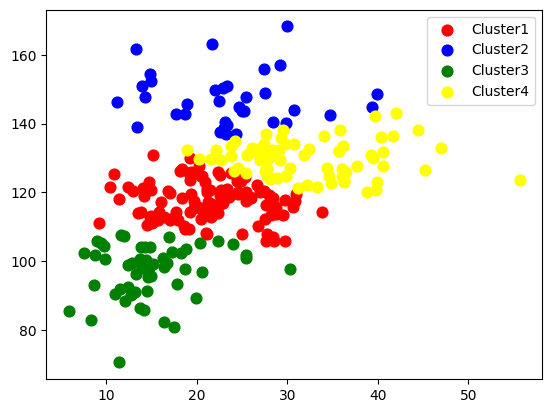

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')

plt.legend()

plt.show()